In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization,Dropout
from keras.optimizers import Adam,SGD

In [2]:
train_data = keras.utils.image_dataset_from_directory(
    directory='images/train',
    labels='inferred',
    label_mode='int',
    batch_size = 10,
    image_size=(256,256)
)
test_data = keras.utils.image_dataset_from_directory(
    directory='images/val',
    labels='inferred',
    label_mode='int',
    batch_size = 10,
    image_size=(256,256)
)

Found 192 files belonging to 2 classes.
Found 30 files belonging to 2 classes.


In [3]:
def normalize(image,label):
    image = tf.cast(image/255,tf.float32)
    return image,label
train_data = train_data.map(normalize)
test_data = test_data.map(normalize)

In [4]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 256, 256, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 126, 126, 64)      256       
 chNormalization)                                                
                                                        

In [6]:
opt = SGD(learning_rate=0.001,momentum=0.9)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [7]:
model.fit(train_data,epochs=20,validation_data=test_data)

Epoch 1/20
20/20 [==============================] - 15s 656ms/step - loss: 1.0090 - accuracy: 0.7031 - val_loss: 0.5832 - val_accuracy: 0.6667
Epoch 2/20
20/20 [==============================] - 13s 619ms/step - loss: 0.8732 - accuracy: 0.7396 - val_loss: 0.7012 - val_accuracy: 0.6667
Epoch 3/20
20/20 [==============================] - 13s 622ms/step - loss: 0.5360 - accuracy: 0.8073 - val_loss: 0.9786 - val_accuracy: 0.6667
Epoch 4/20
20/20 [==============================] - 13s 625ms/step - loss: 0.3853 - accuracy: 0.8490 - val_loss: 1.5954 - val_accuracy: 0.6667
Epoch 5/20
20/20 [==============================] - 12s 616ms/step - loss: 0.1755 - accuracy: 0.9479 - val_loss: 2.5675 - val_accuracy: 0.6667
Epoch 6/20
20/20 [==============================] - 13s 618ms/step - loss: 0.1571 - accuracy: 0.9427 - val_loss: 4.0203 - val_accuracy: 0.6667
Epoch 7/20
20/20 [==============================] - 13s 649ms/step - loss: 0.1977 - accuracy: 0.9479 - val_loss: 5.8911 - val_accuracy: 0.6667

In [8]:
import cv2
import matplotlib.pyplot as plt

1/1 [==============================] - 1s 611ms/step


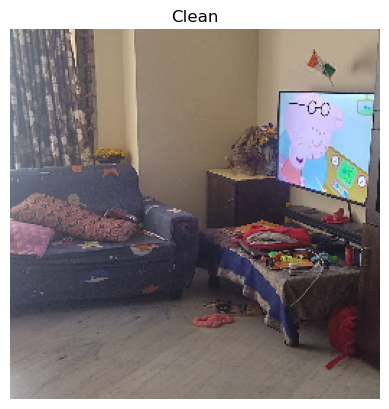

In [9]:
path = 'images/test/room.jpg'
img = cv2.imread(path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(256,256))
plt.imshow(img)
plt.axis('off')
img = img.reshape((1,256,256,3))
pred = "Clean" if model.predict(img)[0] >= 0.5 else "Messy"
plt.title(pred)
plt.show()

1/1 [==============================] - 0s 49ms/step


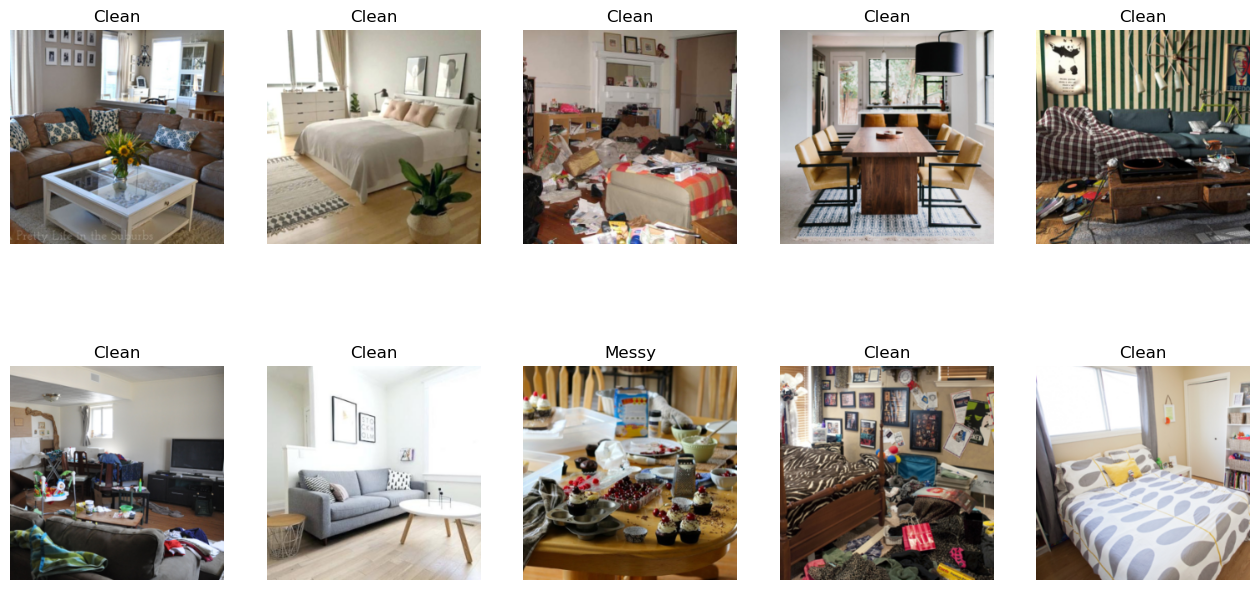

In [16]:
fig,axes = plt.subplots(2,5,figsize=(16,8))
k=0

for i in range(2):
    for j in range(5):
        path = f'images/test/{k}.png'
        k+=1
        img = cv2.imread(path)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img = cv2.resize(img,(256,256))
        axes[i][j].imshow(img)
        axes[i][j].axis('off')
        img = img.reshape((1,256,256,3))
        img = tf.cast(img,tf.float32)
        pred = "Clean" if model.predict(img)[0] >= 0.5 else "Messy"
        axes[i][j].set_title(pred)

# Using Data Augmentation

In [17]:
from keras.preprocessing.image import ImageDataGenerator

In [18]:
# create data generators
train_datagen = ImageDataGenerator(rescale=1.0/255.0,
 width_shift_range=0.2, height_shift_range=0.2,rotation_range=10,zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [19]:
train = train_datagen.flow_from_directory('images/train/',
    class_mode='binary', batch_size=10, target_size=(256, 256))
test = test_datagen.flow_from_directory('images/val/',
    class_mode='binary', batch_size=10, target_size=(256, 256))

Found 192 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [21]:
model = Sequential()
model.add(Conv2D(16,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 batch_normalization_7 (Bat  (None, 254, 254, 16)      64        
 chNormalization)                                                
                                                                 
 conv2d_8 (Conv2D)           (None, 252, 252, 32)      4640      
                                                                 
 batch_normalization_8 (Bat  (None, 252, 252, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 126, 126, 32)      0         
 g2D)                                                            
                                                      

In [23]:
model.fit(train,validation_data=test,epochs=25)

Epoch 1/25
20/20 [==============================] - 22s 991ms/step - loss: 7.1677 - accuracy: 0.7135 - val_loss: 3.9549 - val_accuracy: 0.6667
Epoch 2/25
20/20 [==============================] - 18s 892ms/step - loss: 5.0069 - accuracy: 0.6510 - val_loss: 5.4759 - val_accuracy: 0.6667
Epoch 3/25
20/20 [==============================] - 18s 873ms/step - loss: 4.8461 - accuracy: 0.6927 - val_loss: 17.2096 - val_accuracy: 0.6667
Epoch 4/25
20/20 [==============================] - 18s 888ms/step - loss: 5.6481 - accuracy: 0.6719 - val_loss: 24.8998 - val_accuracy: 0.6667
Epoch 5/25
20/20 [==============================] - 18s 870ms/step - loss: 4.0729 - accuracy: 0.7500 - val_loss: 18.2491 - val_accuracy: 0.6667
Epoch 6/25
20/20 [==============================] - 18s 892ms/step - loss: 6.3823 - accuracy: 0.6094 - val_loss: 9.0419 - val_accuracy: 0.3000
Epoch 7/25
20/20 [==============================] - 18s 891ms/step - loss: 3.4659 - accuracy: 0.7292 - val_loss: 31.8254 - val_accuracy: 0.

1/1 [==============================] - 0s 51ms/step


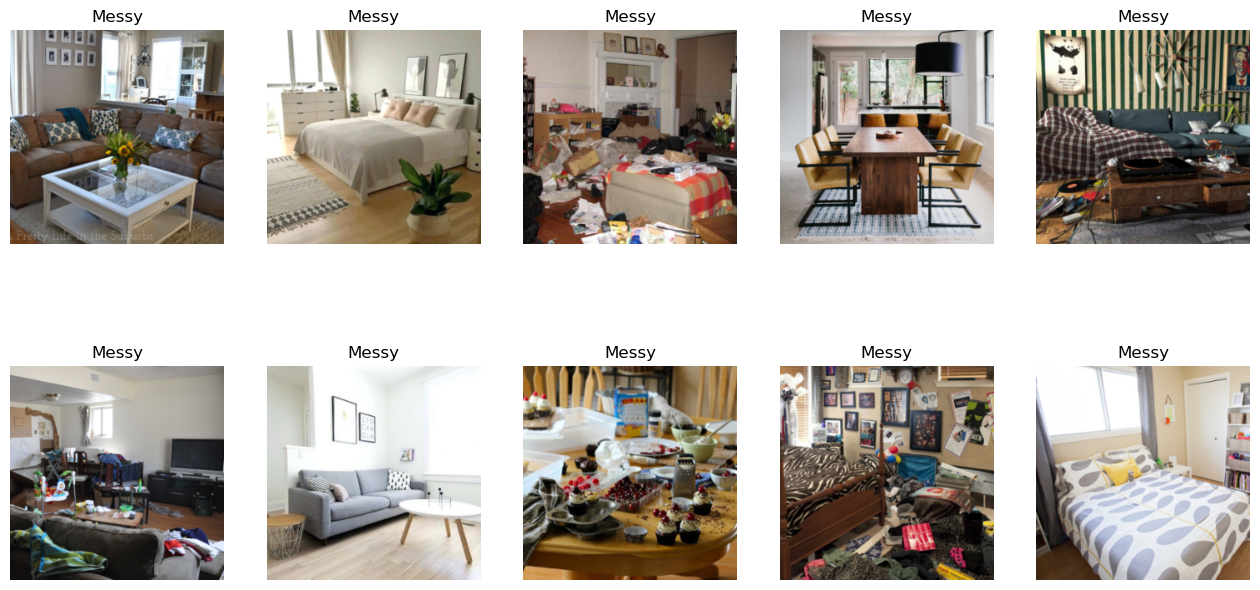

In [26]:
fig,axes = plt.subplots(2,5,figsize=(16,8))
k=0

for i in range(2):
    for j in range(5):
        path = f'images/test/{k}.png'
        k+=1
        img = cv2.imread(path)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img = cv2.resize(img,(256,256))
        axes[i][j].imshow(img)
        axes[i][j].axis('off')
        img = img.reshape((1,256,256,3))
        img = tf.cast(img,tf.float32)
        pred = "Clean" if model.predict(img)[0] >= 0.5 else "Messy"
        axes[i][j].set_title(pred)